In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn

In [ ]:
# Import libraries for data analysis and visualization
import pandas as pd         # Data manipulation
import numpy as np          # Numerical operations
import matplotlib.pyplot as plt  # Plotting
import seaborn as sns      # Statistical data visualization

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
def load_data(file_path):
  file_path = '/content/drive/My Drive/International_Education_Costs/International_Education_Costs.csv'
  df = pd.read_csv(file_path)
  return df

In [ ]:

# Preview the datasets
print("International Education Costs Dataset Preview:")
intl_edu_df = load_data('/content/drive/My Drive/International_Education_Costs.csv')
print(intl_edu_df)


International Education Costs Dataset Preview:
          Country        City                      University  \
0             USA   Cambridge              Harvard University   
1              UK      London         Imperial College London   
2          Canada     Toronto           University of Toronto   
3       Australia   Melbourne         University of Melbourne   
4         Germany      Munich  Technical University of Munich   
..            ...         ...                             ...   
902        France  Strasbourg        University of Strasbourg   
903      Malaysia       Nilai                            USIM   
904  Saudi Arabia     Al-Ahsa          King Faisal University   
905           USA     Seattle        University of Washington   
906            UK  Nottingham        University of Nottingham   

                    Program     Level  Duration_Years  Tuition_USD  \
0          Computer Science    Master             2.0        55400   
1              Data Science    M

In [ ]:
# Average tuition by country
avg_tuition = intl_edu_df.groupby('Country')['Tuition_USD'].mean().sort_values(ascending=False)
avg_tuition.head()

,Tuition_USD
Country,
USA,47742.307692
Australia,34610.465116
Singapore,34172.222222
UK,30341.935484
Canada,29456.578947


In [ ]:

#  numerical columns with the mean or median
for col in intl_edu_df.select_dtypes(include=np.number).columns:
  if intl_edu_df[col].isnull().any():
    median_val = intl_edu_df[col].median()
    intl_edu_df[col].fillna(median_val, inplace=True)

# Example: Impute categorical columns with the mode
for col in intl_edu_df.select_dtypes(include='object').columns:
  if intl_edu_df[col].isnull().any():
    mode_val = intl_edu_df[col].mode()[0]
    intl_edu_df[col].fillna(mode_val, inplace=True)

# Verify the cleaning process
print("\nDataset after cleaning:")
print(intl_edu_df.info())
print("\nMissing values after cleaning:")
print(intl_edu_df.isnull().sum())


Dataset after cleaning:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB
None

Missing values after cleaning:
Country              0
City                 0
University           0
Program              0
Level 

In [ ]:
# Handle missing values: Impute or drop based on analysis
print(intl_edu_df[['Country', 'Tuition_USD']].dropna())


          Country  Tuition_USD
0             USA        55400
1              UK        41200
2          Canada        38500
3       Australia        42000
4         Germany          500
..            ...          ...
902        France         4000
903      Malaysia         6800
904  Saudi Arabia         4200
905           USA        50000
906            UK        34000

[907 rows x 2 columns]


In [ ]:
print(intl_edu_df['Tuition_USD'].describe())
print(intl_edu_df['Country'].unique())


count      907.000000
mean     16705.016538
std      16582.385275
min          0.000000
25%       2850.000000
50%       7500.000000
75%      31100.000000
max      62000.000000
Name: Tuition_USD, dtype: float64
['USA' 'UK' 'Canada' 'Australia' 'Germany' 'Japan' 'Netherlands'
 'Singapore' 'France' 'Switzerland' 'Sweden' 'Denmark' 'China'
 'South Korea' 'Ireland' 'New Zealand' 'Austria' 'Belgium' 'Hong Kong'
 'Portugal' 'Israel' 'Taiwan' 'Czech Republic' 'India' 'Poland' 'Malaysia'
 'Spain' 'Italy' 'Finland' 'Norway' 'Brazil' 'Turkey' 'Russia' 'Mexico'
 'Greece' 'Thailand' 'UAE' 'South Africa' 'Egypt' 'Argentina' 'Indonesia'
 'Saudi Arabia' 'Nigeria' 'Vietnam' 'Hungary' 'Iceland' 'Colombia'
 'Romania' 'Luxembourg' 'Tunisia' 'Cyprus' 'Croatia' 'Dominican Republic'
 'Morocco' 'Peru' 'Ecuador' 'Lebanon' 'Bahrain' 'Uruguay' 'Bulgaria'
 'Ghana' 'Algeria' 'Panama' 'Bangladesh' 'Kuwait' 'Ukraine' 'Slovenia'
 'Serbia' 'Iran' 'Uzbekistan' 'El Salvador']


In [ ]:
# data processing

# Summary statistics
print("\nSummary statistics after cleaning:")
print(intl_edu_df.describe(include='all'))
print("\nData Processing Complete.")


Summary statistics after cleaning:
       Country       City                University           Program   Level  \
count      907        907                       907               907     907   
unique      71        556                       622                92       3   
top         UK  Singapore  University of Washington  Computer Science  Master   
freq        93         18                         6               312     451   
mean       NaN        NaN                       NaN               NaN     NaN   
std        NaN        NaN                       NaN               NaN     NaN   
min        NaN        NaN                       NaN               NaN     NaN   
25%        NaN        NaN                       NaN               NaN     NaN   
50%        NaN        NaN                       NaN               NaN     NaN   
75%        NaN        NaN                       NaN               NaN     NaN   
max        NaN        NaN                       NaN               NaN    


Dataset after dropping rows with NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            907 non-null    object 
 1   City               907 non-null    object 
 2   University         907 non-null    object 
 3   Program            907 non-null    object 
 4   Level              907 non-null    object 
 5   Duration_Years     907 non-null    float64
 6   Tuition_USD        907 non-null    int64  
 7   Living_Cost_Index  907 non-null    float64
 8   Rent_USD           907 non-null    int64  
 9   Visa_Fee_USD       907 non-null    int64  
 10  Insurance_USD      907 non-null    int64  
 11  Exchange_Rate      907 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 85.2+ KB
None

Dataset after dropping columns with NaNs:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906


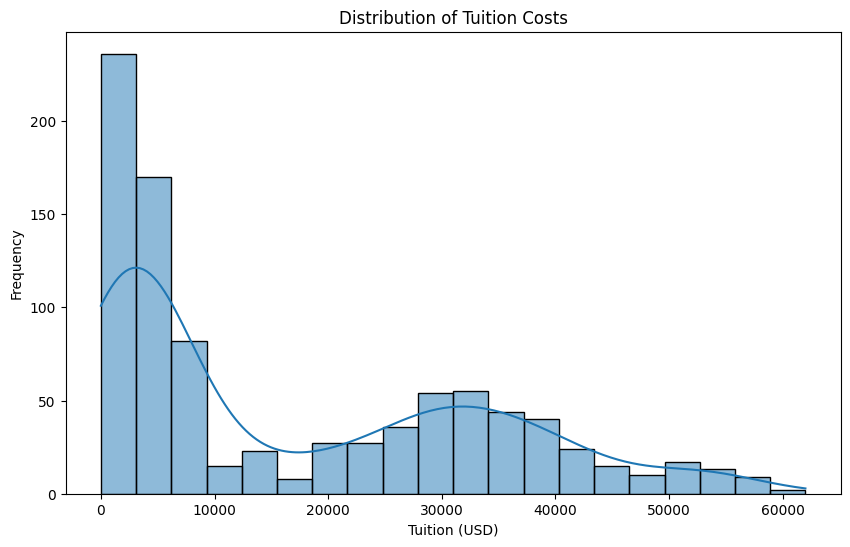

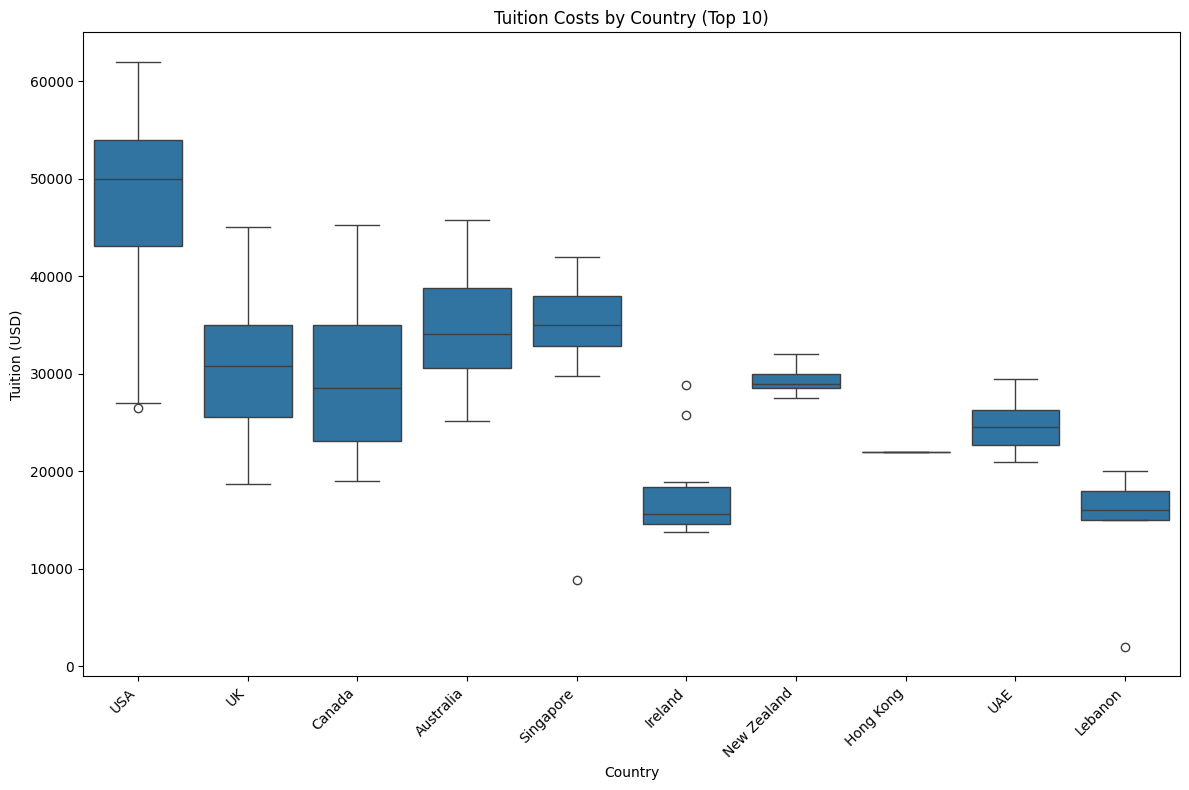

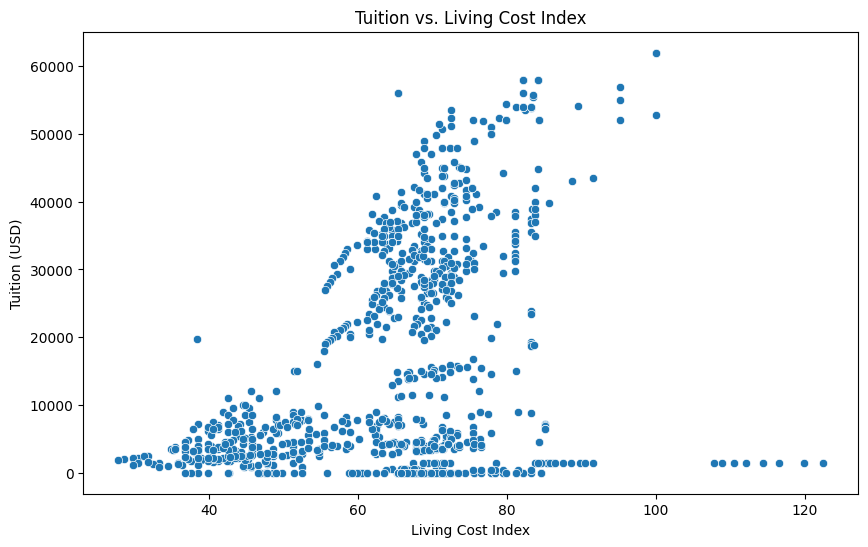

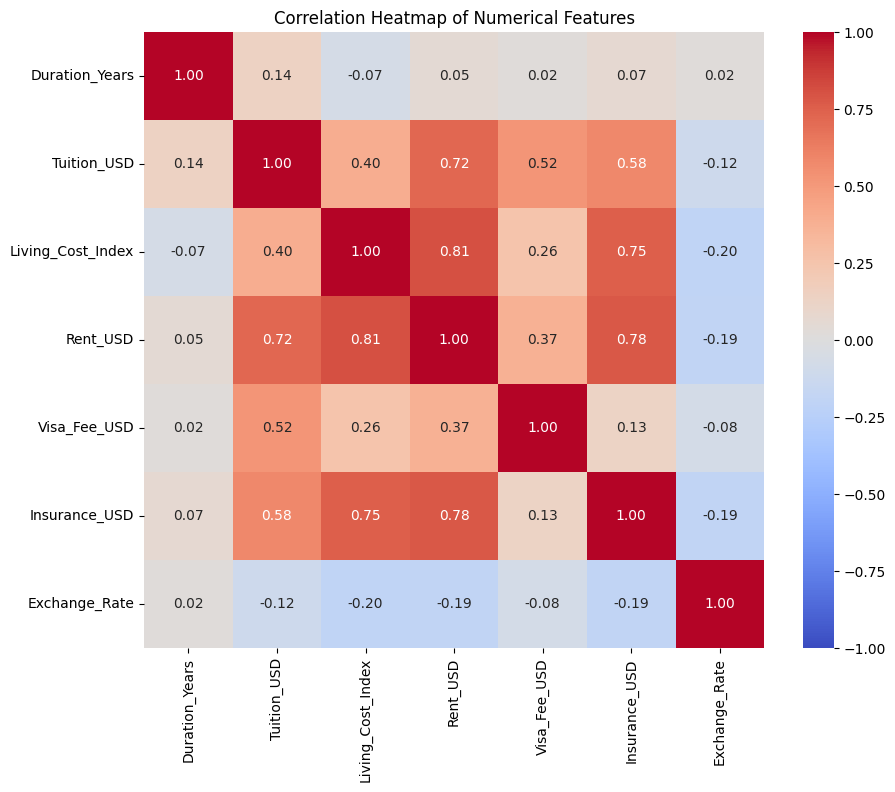

In [ ]:

# Drop rows with any missing values
intl_edu_df_dropped_rows = intl_edu_df.dropna()
# Drop columns with any missing values
intl_edu_df_dropped_cols = intl_edu_df.dropna(axis=1)
print("\nDataset after dropping rows with NaNs:")
print(intl_edu_df_dropped_rows.info())
print("\nDataset after dropping columns with NaNs:")
print(intl_edu_df_dropped_cols.info())
# --- Visualizations ---
# Distribution of Tuition Costs
plt.figure(figsize=(10, 6))
sns.histplot(intl_edu_df['Tuition_USD'], kde=True, bins=20)
plt.title('Distribution of Tuition Costs')
plt.xlabel('Tuition (USD)')
plt.ylabel('Frequency')
plt.show()

# Box plot of Tuition Costs by Country (Top 10)
plt.figure(figsize=(12, 8))
top_countries = avg_tuition.head(10).index
sns.boxplot(x='Country', y='Tuition_USD', data=intl_edu_df[intl_edu_df['Country'].isin(top_countries)])
plt.title('Tuition Costs by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Tuition (USD)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Scatter plot of Tuition vs. Living Cost Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Living_Cost_Index', y='Tuition_USD', data=intl_edu_df)
plt.title('Tuition vs. Living Cost Index')
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')
plt.show()

# Correlation Heatmap of numerical features
plt.figure(figsize=(10, 8))
correlation_matrix = intl_edu_df.select_dtypes(include=np.number).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

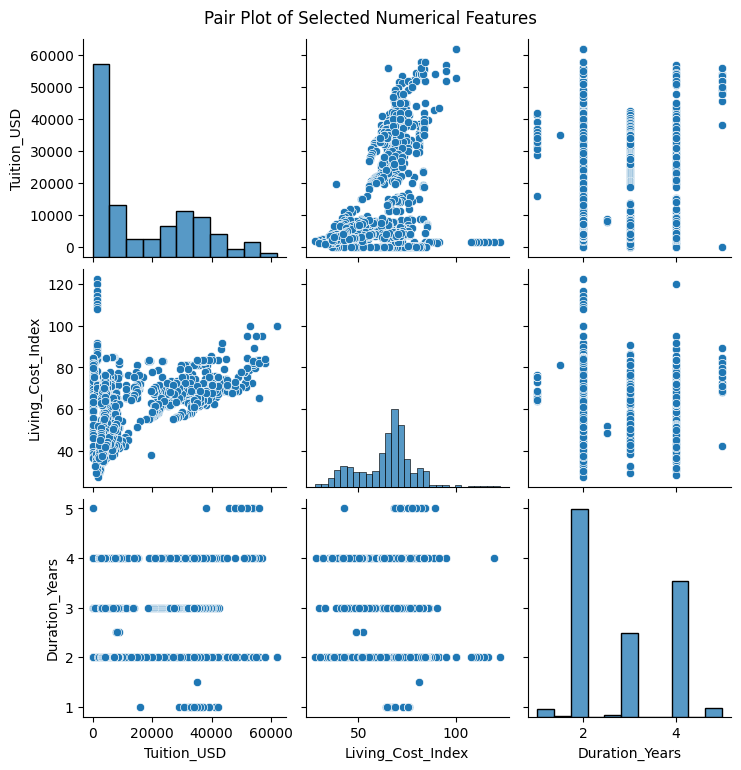

In [ ]:

# Pair plot of a subset of numerical features
numerical_cols_for_pairplot = ['Tuition_USD', 'Living_Cost_Index', 'Duration_Years']
sns.pairplot(intl_edu_df[numerical_cols_for_pairplot])
plt.suptitle('Pair Plot of Selected Numerical Features', y=1.02)
plt.show()

KNN Regressor - Mean Squared Error: 226887220.02197802
KNN Regressor - R-squared: 0.1302487427020006


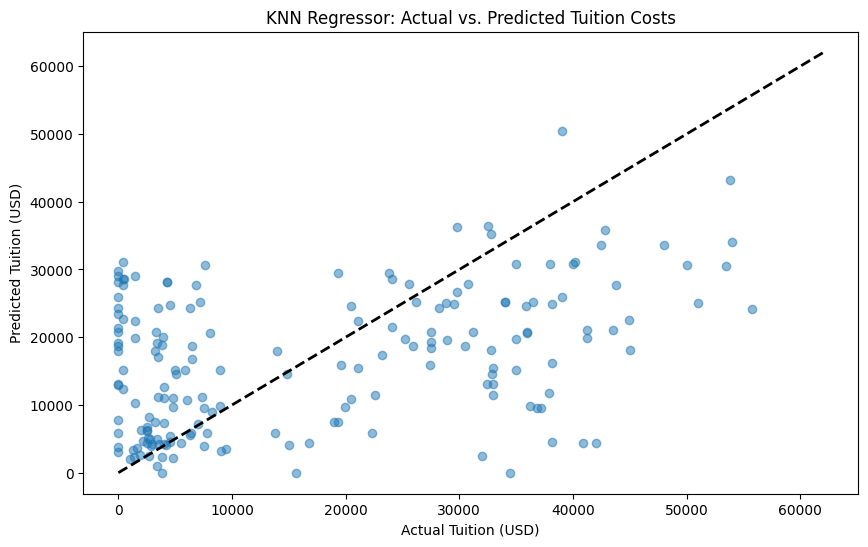

In [ ]:

!pip install scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Select features and target variable
features = ['Living_Cost_Index', 'Duration_Years']  # Using relevant numerical features
target = 'Tuition_USD'
X = intl_edu_df[features]
y = intl_edu_df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5) # You can adjust the number of neighbors (k)
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regressor - Mean Squared Error: {mse_knn}")
print(f"KNN Regressor - R-squared: {r2_knn}")

# Optional: Visualize actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_knn, alpha=0.5)
plt.xlabel("Actual Tuition (USD)")
plt.ylabel("Predicted Tuition (USD)")
plt.title("KNN Regressor: Actual vs. Predicted Tuition Costs")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2) # Plotting a diagonal line
plt.show()

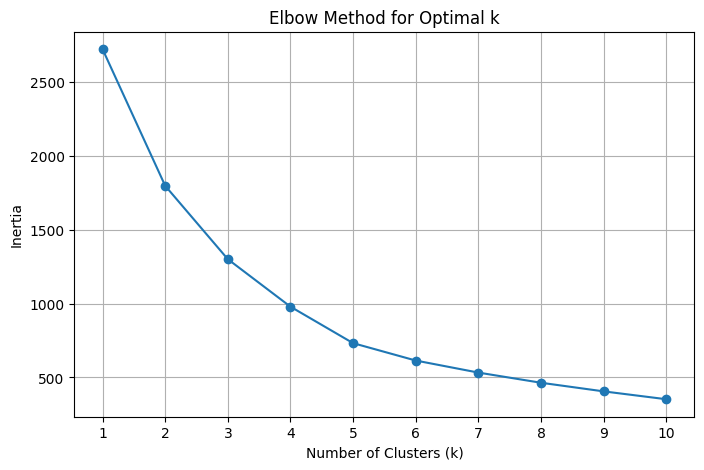


Cluster distribution:
Cluster
1    284
0    266
2    224
3    133
Name: count, dtype: int64

Cluster characteristics (mean values):
          Tuition_USD  Living_Cost_Index  Duration_Years
Cluster                                                 
0         4563.721805          71.103383        2.195489
1        28074.295775          70.608451        3.757042
2         4092.857143          44.765625        2.997768
3        37951.879699          71.060150        1.883459


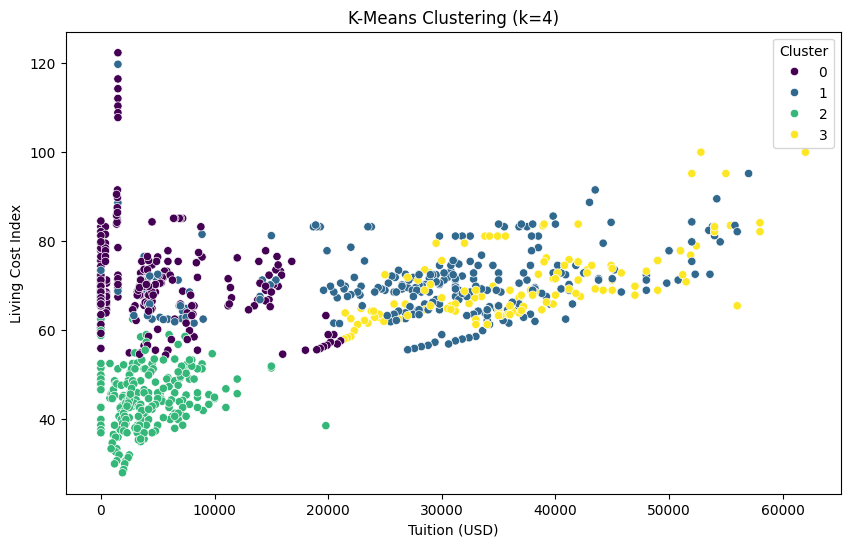


Distribution of Country within Clusters:
Country  Algeria  Argentina  Australia  Austria  Bahrain  Bangladesh  Belgium  \
Cluster                                                                         
0              0          0          0        8        2           0        6   
1              0          0         55        1        3           0        3   
2              5          6          0        0        0           5        0   
3              0          0         31        0        0           0        0   

Country  Brazil  Bulgaria  Canada  ...  Thailand  Tunisia  Turkey  UAE  UK  \
Cluster                            ...                                       
0             1         0       9  ...         0        0       0    0   0   
1             0         0      38  ...         0        0       0    4  69   
2             7         5       0  ...         8        6       9    0   0   
3             0         0      29  ...         0        0       0    4  24   

Co

In [ ]:
#  k-Means Clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
# Select features for clustering
features_for_clustering = ['Tuition_USD', 'Living_Cost_Index', 'Duration_Years']
X_cluster = intl_edu_df[features_for_clustering]
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)
# Determine the optimal number of clusters using the Elbow method
inertia = []
k_range = range(1, 11)  # Trying k from 1 to 10

for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Set n_init to avoid warning
  kmeans.fit(X_scaled)
  inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.xticks(k_range)
plt.grid(True)
plt.show()

# Let's assume we choose k=4 for this example
optimal_k = 4

# Apply K-Means clustering with the chosen number of clusters
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
intl_edu_df['Cluster'] = kmeans_final.fit_predict(X_scaled)

# Analyze the clusters
print("\nCluster distribution:")
print(intl_edu_df['Cluster'].value_counts())

# View the characteristics of each cluster (e.g., mean of features within each cluster)
print("\nCluster characteristics (mean values):")
print(intl_edu_df.groupby('Cluster')[features_for_clustering].mean())

# Visualize the clusters (example using a scatter plot with two features and color-coding by cluster)
# You might need to choose the two most relevant features for visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Tuition_USD', y='Living_Cost_Index', hue='Cluster', data=intl_edu_df, palette='viridis', legend='full')
plt.title(f'K-Means Clustering (k={optimal_k})')
plt.xlabel('Tuition (USD)')
plt.ylabel('Living Cost Index')
plt.show()

# Select categorical columns
categorical_cols = intl_edu_df.select_dtypes(include='object').columns

# Analyze the distribution of categorical features within each cluster
for col in categorical_cols:
    print(f"\nDistribution of {col} within Clusters:")
    cluster_distribution = intl_edu_df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
    print(cluster_distribution)

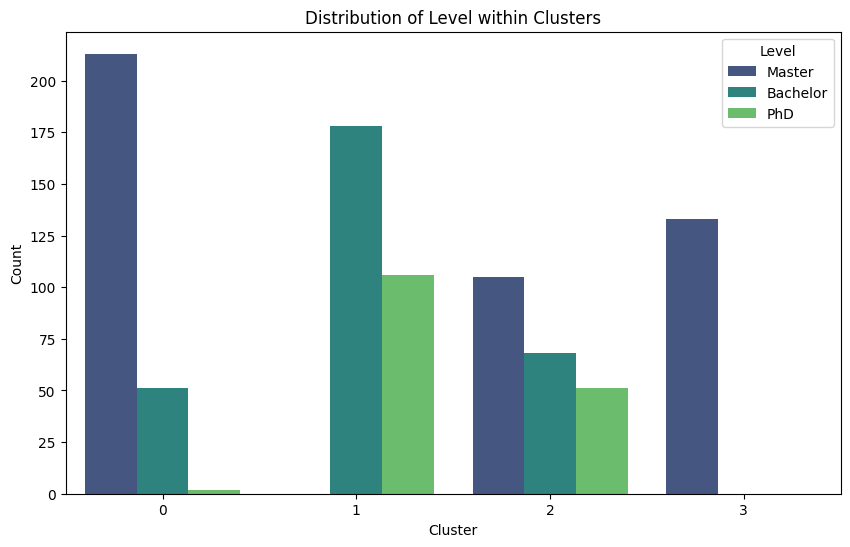

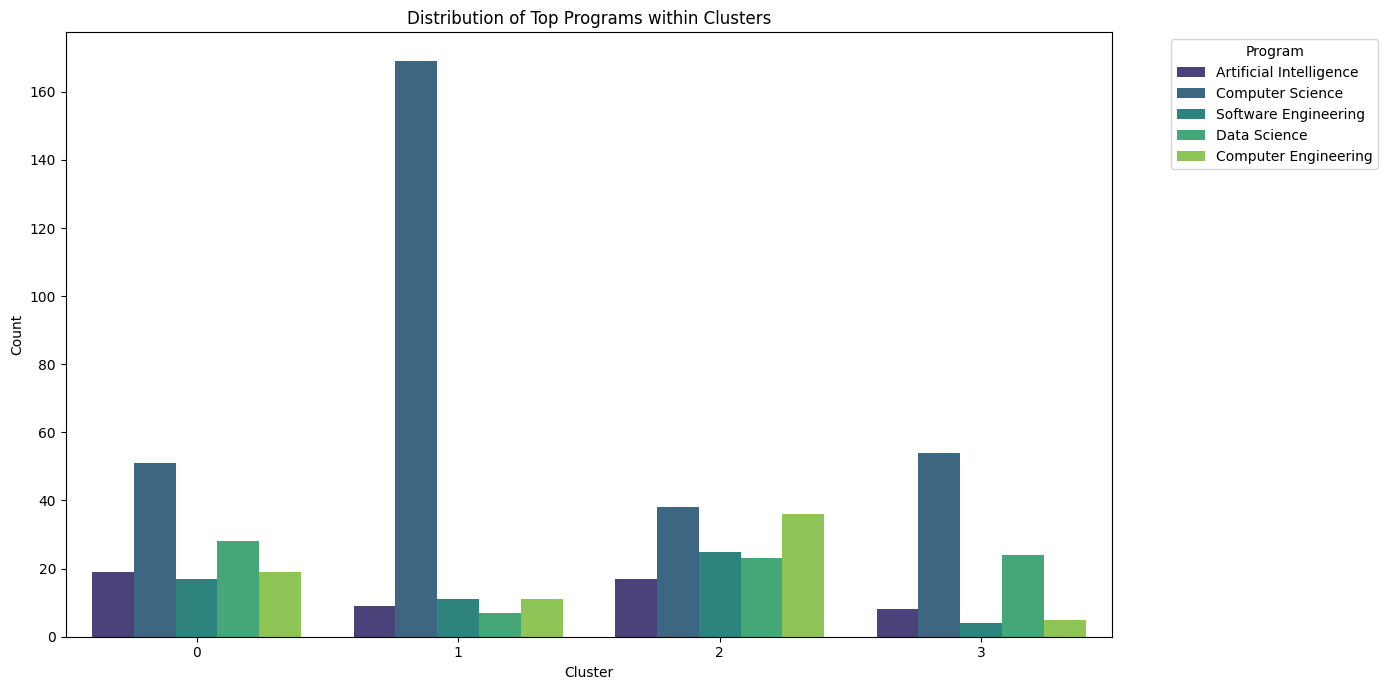

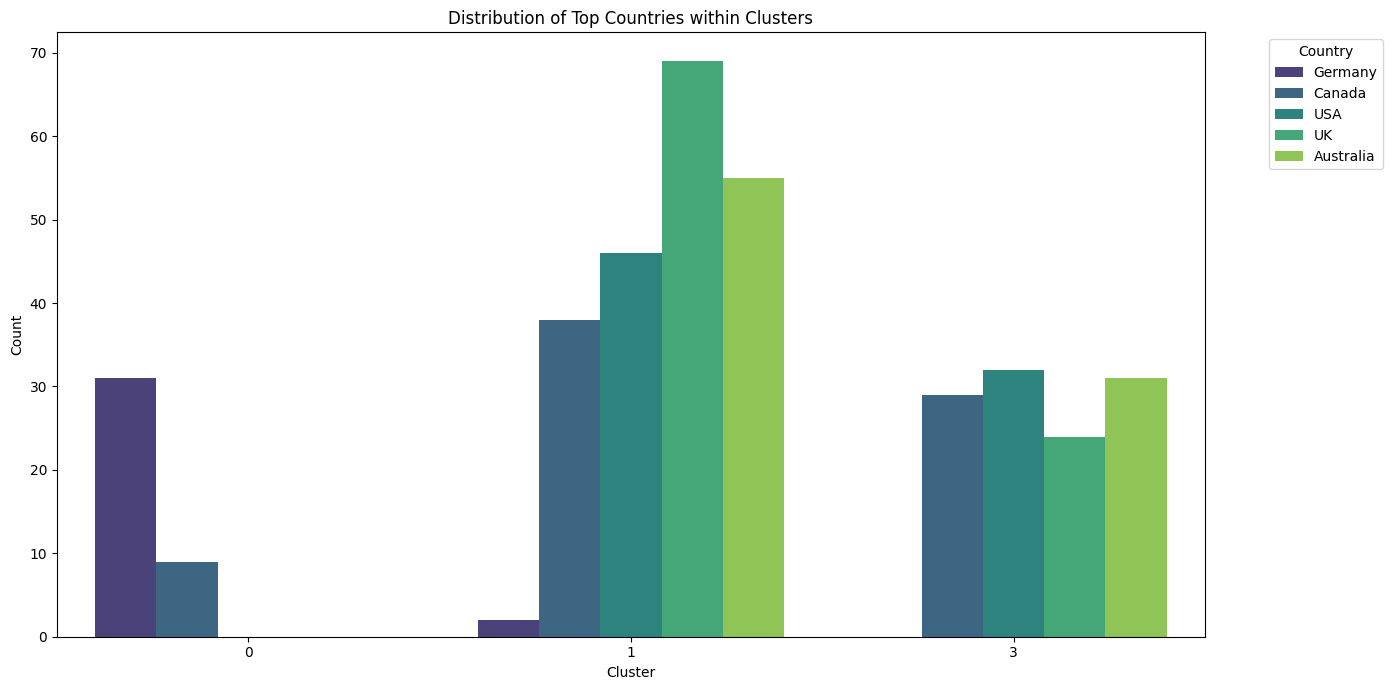

In [ ]:
# Optionally, visualize the distributions using bar plots for selected categorical features and clusters

# Visualize the distribution of 'Level' within clusters
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', hue='Level', data=intl_edu_df, palette='viridis')
plt.title('Distribution of Level within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Visualize the distribution of 'Program' within clusters for the top N programs
top_programs = intl_edu_df['Program'].value_counts().nlargest(5).index
plt.figure(figsize=(14, 7))
sns.countplot(x='Cluster', hue='Program', data=intl_edu_df[intl_edu_df['Program'].isin(top_programs)], palette='viridis')
plt.title('Distribution of Top Programs within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Program', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Visualize the distribution of 'Country' within clusters for the top N countries
top_countries = intl_edu_df['Country'].value_counts().nlargest(5).index
plt.figure(figsize=(14, 7))
sns.countplot(x='Cluster', hue='Country', data=intl_edu_df[intl_edu_df['Country'].isin(top_countries)], palette='viridis')
plt.title('Distribution of Top Countries within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Hypothetical Future Scenarios:
   Living_Cost_Index  Duration_Years
0                120               4
1                150               3
2                 90               5

Predicted Tuition Costs for Future Scenarios (USD):
[ 1500.  1500. 28716.]


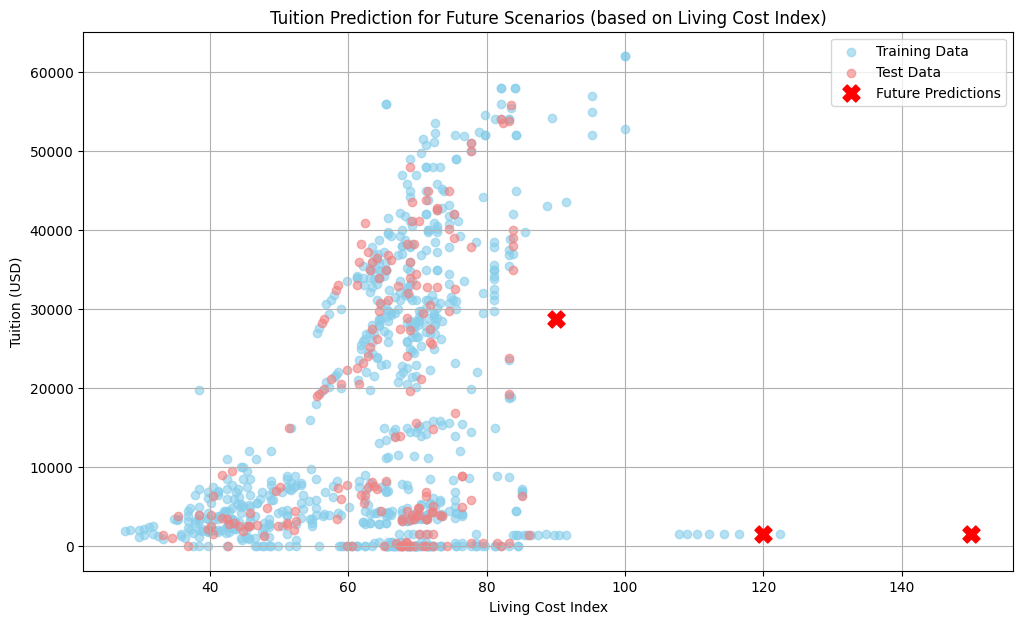

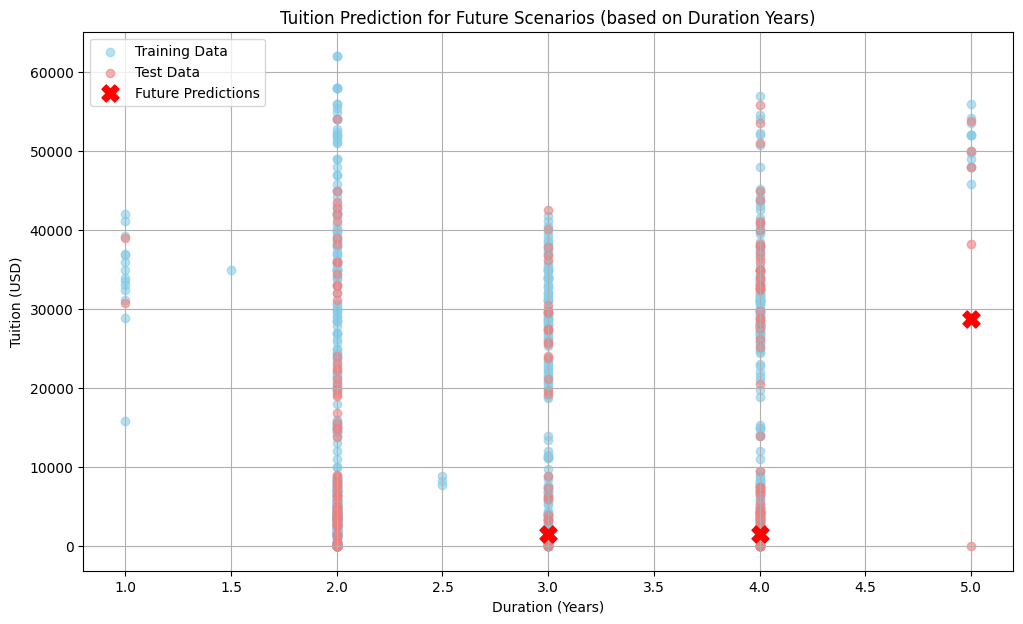

In [ ]:

# --- Future Prediction with Plots ---

# You can change these values to represent different future situations
future_scenarios = pd.DataFrame({
    'Living_Cost_Index': [120, 150, 90],
    'Duration_Years': [4, 3, 5]
})

print("\nHypothetical Future Scenarios:")
print(future_scenarios)

# Note: The scaler was fitted on X_cluster for clustering, but we should ideally fit a scaler on X_train
# Let's refit a scaler specifically for the features used in regression
scaler_reg = StandardScaler()
X_train_scaled_reg = scaler_reg.fit_transform(X_train)
future_scenarios_scaled = scaler_reg.transform(future_scenarios)

# So we use the original future_scenarios DataFrame for prediction with the model trained on unscaled data
future_predictions = knn_model.predict(future_scenarios)

print("\nPredicted Tuition Costs for Future Scenarios (USD):")
print(future_predictions)

# Visualize the original data points and the future predictions

plt.figure(figsize=(12, 7))

# Plot original training data
plt.scatter(X_train['Living_Cost_Index'], y_train, alpha=0.6, label='Training Data', color='skyblue')
plt.scatter(X_test['Living_Cost_Index'], y_test, alpha=0.6, label='Test Data', color='lightcoral')


# Plot the future prediction points
plt.scatter(future_scenarios['Living_Cost_Index'], future_predictions, color='red', marker='X', s=150, label='Future Predictions', zorder=5)


# Add labels and title
plt.xlabel('Living Cost Index')
plt.ylabel('Tuition (USD)')
plt.title('Tuition Prediction for Future Scenarios (based on Living Cost Index)')
plt.legend()
plt.grid(True)
plt.show()

# You can create another plot showing the relationship with Duration_Years if needed
plt.figure(figsize=(12, 7))

# Plot original training data
plt.scatter(X_train['Duration_Years'], y_train, alpha=0.6, label='Training Data', color='skyblue')
plt.scatter(X_test['Duration_Years'], y_test, alpha=0.6, label='Test Data', color='lightcoral')

# Plot the future prediction points
plt.scatter(future_scenarios['Duration_Years'], future_predictions, color='red', marker='X', s=150, label='Future Predictions', zorder=5)

# Add labels and title
plt.xlabel('Duration (Years)')
plt.ylabel('Tuition (USD)')
plt.title('Tuition Prediction for Future Scenarios (based on Duration Years)')
plt.legend()
plt.grid(True)
plt.show()



In [ ]:

# Clean and analyze the distribution of categorical features within clusters
categorical_cols = intl_edu_df.select_dtypes(include='object').columns

for col in categorical_cols:
  print(f"\nDistribution of {col} within Clusters:")
  cluster_distribution = intl_edu_df.groupby('Cluster')[col].value_counts().unstack(fill_value=0)
cluster_distribution



Distribution of Country within Clusters:

Distribution of City within Clusters:

Distribution of University within Clusters:

Distribution of Program within Clusters:

Distribution of Level within Clusters:


Level,Bachelor,Master,PhD
Cluster,,,
0,51,213,2
1,178,0,106
2,68,105,51
3,0,133,0


In [ ]:
# Using dataframe cluster_distribution:

import altair as alt
# Melt the dataframe to long format for plotting
melted_cluster_distribution = cluster_distribution.reset_index().melt(
    id_vars='Cluster',
    var_name='Education Level',
    value_name='Count'
)
# Create a stacked bar chart
chart = alt.Chart(melted_cluster_distribution).mark_bar().encode(
    x='Cluster:O',  # Make Cluster an ordinal variable for discrete bars
    y='Count:Q',
    color='Education Level:N',
    tooltip=['Cluster', 'Education Level', 'Count']
).properties(
    title='Distribution of Education Levels by Cluster'
)
chart

alt.Chart(...)